In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from joblib import dump, load

Accuracy: 0.6470588235294118
Best Parameters: {'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 50}
Cross-validation score with best parameters: 0.8483516483516483


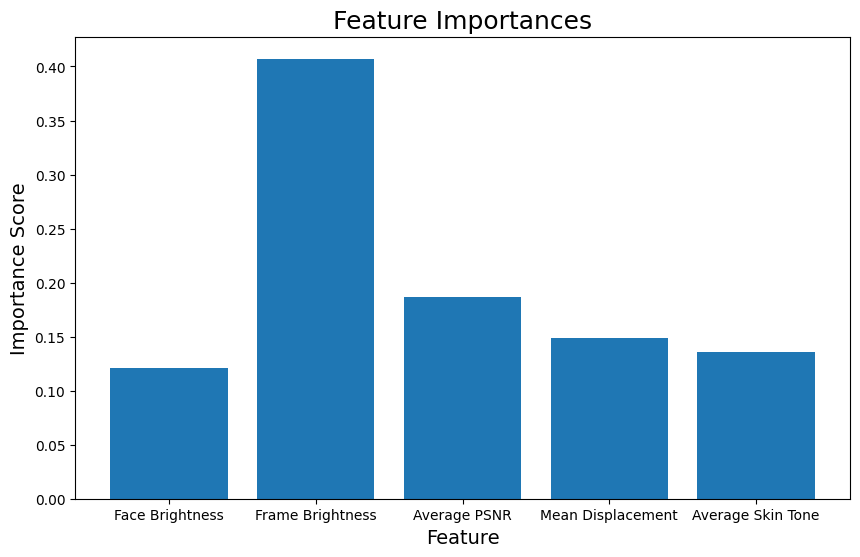

['best_model.joblib']

In [6]:


# Loading arrays from disk
all_face_brightness = np.load('Segmente/all_face_brightness.npy')
all_frame_brightness = np.load('Segmente/all_frame_brightness.npy')
all_average_psnr = np.load('Segmente/all_average_psnr.npy')
all_mean_displacement = np.load('Segmente/all_mean_displacement.npy')
all_average_skin_tone = np.load('Segmente/all_average_skin_tone.npy')

y1 = np.load('Segmente/freq_dif.npy')
y2 = np.load('Segmente/all_dist.npy')

calssifie = 'freq'


if calssifie == 'freq':
    #print(y1)
    y = np.where(y1 < 0.05, 1, 0)
    #print(y)
if calssifie == 'dtw':
    #print(y2)
    y = np.where(y2 < 2.5, 1, 0)
    #print(y)


X = np.column_stack((all_face_brightness, all_frame_brightness, all_average_psnr, all_mean_displacement, all_average_skin_tone))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100,150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10,15],
    'min_samples_leaf': [1, 2, 4,6]
}

# Initialize Random Forest classifier
clf = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Create a new instance of the classifier with the best parameters
best_clf = RandomForestClassifier(**best_params)

# Fit the new classifier to the training data
best_clf.fit(X_train, y_train)

# Predict on the test set using the best model
y_pred = best_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Best Parameters:", best_params)

best_cv_score = grid_search.best_score_
print("Cross-validation score with best parameters:", best_cv_score)

# Plotting feature importances for the best model
feature_importances = best_clf.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances, align='center')
plt.xticks(range(X.shape[1]), ['Face Brightness', 'Frame Brightness', 'Average PSNR', 'Mean Displacement', 'Average Skin Tone'], fontsize=10)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance Score', fontsize=14)
plt.title('Feature Importances', fontsize=18)
plt.show()

# refit with all data
best_clf.fit(X, y)
# Save the best model to a file
dump(best_clf, 'best_model.joblib')




In [4]:
# Loading arrays from disk
all_face_brightness = np.load('test_data/all_face_brightness.npy')
all_frame_brightness = np.load('test_data/all_frame_brightness.npy')
all_average_psnr = np.load('test_data/all_average_psnr.npy')
all_mean_displacement = np.load('test_data/all_mean_displacement.npy')
all_average_skin_tone = np.load('test_data/all_average_skin_tone.npy')

y1 = np.load('test_data/freq_dif.npy')
y2 = np.load('test_data/all_dist.npy')


calssifie = 'freq'


if calssifie == 'freq':

    y = np.where(y1 < 0.05, 1, 0)

if calssifie == 'dtw':

    y = np.where(y2 < 2.5, 1, 0)


X_new = np.column_stack((all_face_brightness, all_frame_brightness, all_average_psnr, all_mean_displacement, all_average_skin_tone))

loaded_model = load('best_model.joblib')
new_predictions = loaded_model.predict(X_new)

accuracy = accuracy_score(y, new_predictions)

print("Accuracy: {}".format(accuracy))

Accuracy: 0.963855421686747


## Brightness only

### 2 Features


Accuracy: 0.5882352941176471
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Cross-validation score with best parameters: 0.8340659340659341


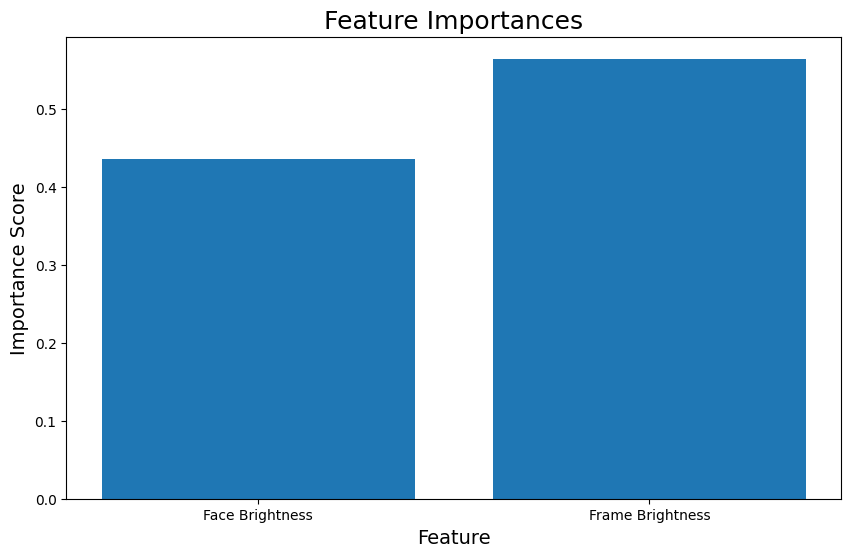

['best_model_brightness.joblib']

In [10]:

all_face_brightness = np.load('Segmente/all_face_brightness.npy')
all_frame_brightness = np.load('Segmente/all_frame_brightness.npy')
all_average_psnr = np.load('Segmente/all_average_psnr.npy')
all_mean_displacement = np.load('Segmente/all_mean_displacement.npy')
all_average_skin_tone = np.load('Segmente/all_average_skin_tone.npy')

y1 = np.load('Segmente/freq_dif.npy')
y2 = np.load('Segmente/all_dist.npy')

calssifie = 'freq'


if calssifie == 'freq':
    #print(y1)
    y = np.where(y1 < 0.05, 1, 0)
    #print(y)
if calssifie == 'dtw':
    #print(y2)
    y = np.where(y2 < 2.5, 1, 0)
    #print(y)
    
X = np.column_stack((all_face_brightness, all_frame_brightness))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150,200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10,15],
    'min_samples_leaf': [1, 2, 4, 6]
}

# Initialize Random Forest classifier
clf = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Create a new instance of the classifier with the best parameters
best_clf = RandomForestClassifier(**best_params)

# Fit the new classifier to the training data
best_clf.fit(X_train, y_train)

# Predict on the test set using the best model
y_pred = best_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Best Parameters:", best_params)

best_cv_score = grid_search.best_score_
print("Cross-validation score with best parameters:", best_cv_score)

# Plotting feature importances for the best model
feature_importances = best_clf.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances, align='center')
plt.xticks(range(X.shape[1]), ['Face Brightness', 'Frame Brightness'], fontsize=10)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance Score', fontsize=14)
plt.title('Feature Importances', fontsize=18)
plt.show()

best_clf.fit(X, y)

# Save the best model to a file
dump(best_clf, 'best_model_brightness.joblib')




In [29]:
# Loading arrays from disk
all_face_brightness = np.load('test_data/all_face_brightness.npy')
all_frame_brightness = np.load('test_data/all_frame_brightness.npy')
all_average_psnr = np.load('test_data/all_average_psnr.npy')
all_mean_displacement = np.load('test_data/all_mean_displacement.npy')
all_average_skin_tone = np.load('test_data/all_average_skin_tone.npy')

y1 = np.load('test_data/freq_dif.npy')
y2 = np.load('test_data/all_dist.npy')


calssifie = 'freq'


if calssifie == 'freq':
    #print(y1)
    y = np.where(y1 < 0.05, 1, 0)
    #print(y)
if calssifie == 'dtw':
    #print(y2)
    y = np.where(y2 < 2.5, 1, 0)
    #print(y)

X_new = np.column_stack((all_face_brightness, all_frame_brightness))

loaded_model = load('best_model_brightness.joblib')
new_predictions = loaded_model.predict(X_new)

accuracy = accuracy_score(y, new_predictions)

print("Accuracy:", accuracy)

Accuracy: 0.8795180722891566


## Only one feature

In [36]:

all_face_brightness = np.load('Segmente/all_face_brightness.npy')
all_frame_brightness = np.load('Segmente/all_frame_brightness.npy')
all_average_psnr = np.load('Segmente/all_average_psnr.npy')
all_mean_displacement = np.load('Segmente/all_mean_displacement.npy')
all_average_skin_tone = np.load('Segmente/all_average_skin_tone.npy')

y1 = np.load('Segmente/freq_dif.npy')
y2 = np.load('Segmente/all_dist.npy')

calssifie = 'freq'


if calssifie == 'freq':
    #print(y1)
    y = np.where(y1 < 0.05, 1, 0)
    #print(y)
if calssifie == 'dtw':
    #print(y2)
    y = np.where(y2 < 2.5, 1, 0)
    #print(y)

X =  all_face_brightness.reshape(-1, 1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest classifier
clf = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Create a new instance of the classifier with the best parameters
best_clf = RandomForestClassifier(**best_params)

# Fit the new classifier to the training data
best_clf.fit(X_train, y_train)

# Predict on the test set using the best model
y_pred = best_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(best_params)

best_cv_score = grid_search.best_score_
print("Cross-validation score with best parameters:", best_cv_score)

best_clf.fit(X, y)

dump(best_clf, 'best_model_brightness1.joblib')



Accuracy: 0.47058823529411764
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


['best_model_brightness1.joblib']

In [5]:
# Loading arrays from disk
all_face_brightness = np.load('test_data/all_face_brightness.npy')
all_frame_brightness = np.load('test_data/all_frame_brightness.npy')
all_average_psnr = np.load('test_data/all_average_psnr.npy')
all_mean_displacement = np.load('test_data/all_mean_displacement.npy')
all_average_skin_tone = np.load('test_data/all_average_skin_tone.npy')

y1 = np.load('test_data/freq_dif.npy')
y2 = np.load('test_data/all_dist.npy')


calssifie = 'freq'


if calssifie == 'freq':
    #print(y1)
    y = np.where(y1 < 0.05, 1, 0)
    #print(y)
if calssifie == 'dtw':
    #print(y2)
    y = np.where(y2 < 2.5, 1, 0)
    #print(y)

X_new =  all_face_brightness.reshape(-1, 1)

loaded_model = load('best_model_brightness1.joblib')
new_predictions = loaded_model.predict(X_new)

accuracy = accuracy_score(y, new_predictions)

print("Accuracy:", accuracy)

Accuracy: 0.8072289156626506


In [15]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from joblib import dump

# Loading arrays from disk
all_face_brightness = np.load('Segmente/all_face_brightness.npy')
all_frame_brightness = np.load('Segmente/all_frame_brightness.npy')
all_average_psnr = np.load('Segmente/all_average_psnr.npy')
all_mean_displacement = np.load('Segmente/all_mean_displacement.npy')
all_average_skin_tone = np.load('Segmente/all_average_skin_tone.npy')

y1 = np.load('Segmente/freq_dif.npy')
y2 = np.load('Segmente/all_dist.npy')

calssifie = 'freq'

if calssifie == 'freq':
    y = np.where(y1 < 0.05, 1, 0)
if calssifie == 'dtw':
    y = np.where(y2 < 2.5, 1, 0)

#X = np.column_stack((all_face_brightness, all_frame_brightness))
X =  all_mean_displacement.reshape(-1, 1)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

# Number of random seeds to try
num_seeds = [5, 42,111,0]

for seed in num_seeds:
    print(f"Processing with random seed: {seed}")
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

    # Initialize Random Forest classifier
    clf = RandomForestClassifier()

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

    # Perform grid search
    grid_search.fit(X_train, y_train)

    # Get the best parameters
    best_params = grid_search.best_params_

    # Create a new instance of the classifier with the best parameters
    best_clf = RandomForestClassifier(**best_params)

    # Fit the new classifier to the training data
    best_clf.fit(X_train, y_train)

    # Predict on the test set using the best model
    y_pred = best_clf.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Best Parameters:", best_params)

    best_cv_score = grid_search.best_score_
    print("Cross-validation score with best parameters:", best_cv_score)

    best_clf.fit(X, y)

    # Save the best model to a file
    dump(best_clf, f'best_model_brightness_seed_{seed}.joblib')

    print()  # Just for better readability in the output


Processing with random seed: 5
Accuracy: 0.7647058823529411
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Cross-validation score with best parameters: 0.743956043956044

Processing with random seed: 42
Accuracy: 0.7058823529411765
Best Parameters: {'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 15, 'n_estimators': 50}
Cross-validation score with best parameters: 0.7725274725274726

Processing with random seed: 111
Accuracy: 0.7647058823529411
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Cross-validation score with best parameters: 0.7274725274725274

Processing with random seed: 0
Accuracy: 0.5294117647058824
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Cross-validation score with best parameters: 0.7890109890109891

